In [3]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('weather_data.csv')

#display first few rows
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
missing_values = df.isnull().sum()
print(missing_values) #checking for missing values

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [11]:
df.describe() #describes the dataset

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [55]:
# Check for skewness in the data
df[['Temperature', 'Humidity','Wind Speed','Precipitation (%)','Atmospheric Pressure','UV Index','Visibility (km)']].skew()

Temperature             0.130238
Humidity               -0.394176
Wind Speed              1.298447
Precipitation (%)      -0.156975
Atmospheric Pressure   -0.289942
UV Index                0.927258
Visibility (km)         1.242713
dtype: float64

In [13]:
# Handle missing values

#  Drop missing values
df.dropna(inplace=True)

In [15]:
# Check for duplicates in the dataset
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop the duplicate rows in the dataset
df = df.drop_duplicates()

Number of duplicate rows: 0


In [17]:
# Check for invalid data in the 'precipitation' column
invalid_precip_rows = df[(df['Precipitation (%)'] < 0) | (df['Precipitation (%)'] > 100)]
indexes = invalid_precip_rows.index

In [19]:
df.drop(indexes,inplace=True)

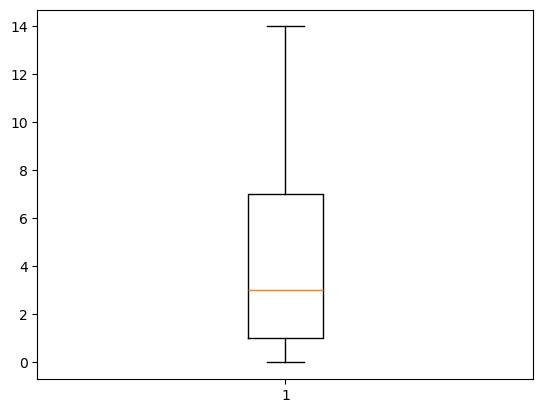

In [21]:
# Check for outliers
# Calculate the IQR for a specific column in the dataset
column_name = "UV Index"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]
# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()


Text(0.5, 1.0, 'Box Plot')

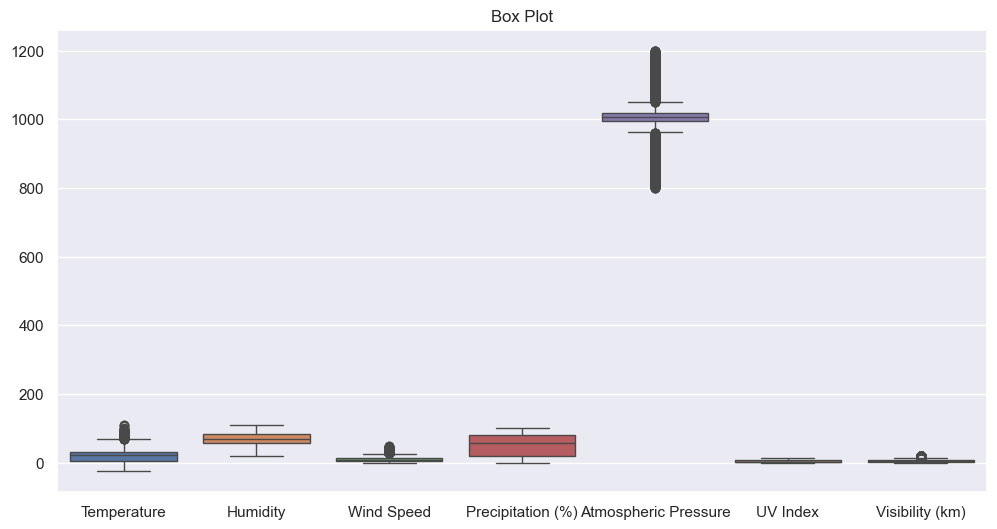

In [23]:
sns.set(rc={"figure.figsize":(12, 6)}) #width=12, #height=6
sns.boxplot(df) #boxplot for the dataframe
plt.title('Box Plot')

In [59]:
#desribes about windspeed data
df['Wind Speed'].describe()

count    12808.000000
mean         9.597556
std          6.613476
min          0.000000
25%          5.000000
50%          8.500000
75%         13.500000
max         48.500000
Name: Wind Speed, dtype: float64

Text(0.5, 1.0, 'Distribution')

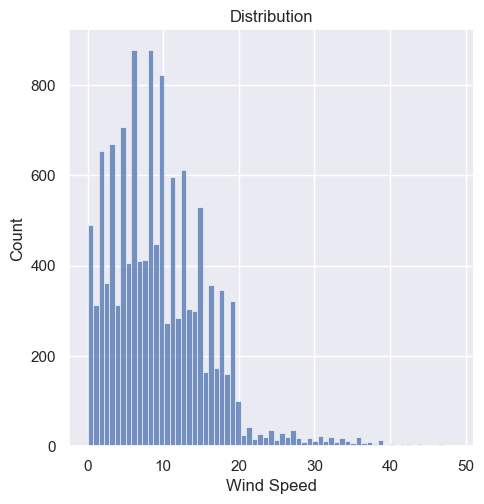

In [25]:
#plotting distribution of windspeed
sns.displot(df['Wind Speed'])
plt.title('Distribution')

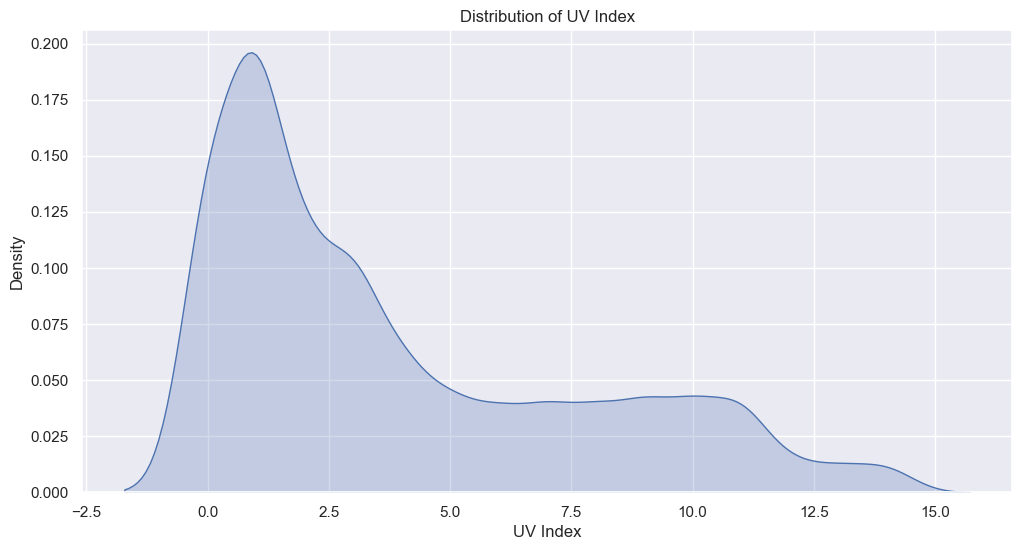

In [27]:
# Visualize 'UV Index' distribution with a kernel density plot
sns.kdeplot(df['UV Index'].dropna(), fill=True)
plt.title("Distribution of UV Index")
plt.show()

<Axes: xlabel='Precipitation (%)', ylabel='Humidity'>

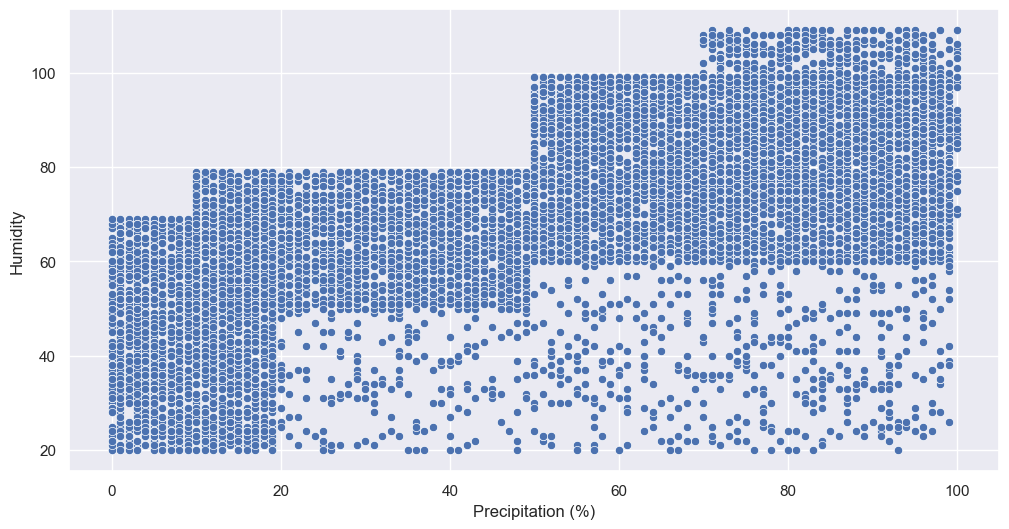

In [29]:
sns.scatterplot(data = df,x="Precipitation (%)",y="Humidity")
#from this scatter plot , we can observe the relation between humidity and precipitation

(array([5443.,    0.,    0., 2537.,    0.,    0., 2414.,    0.,    0.,
        2414.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

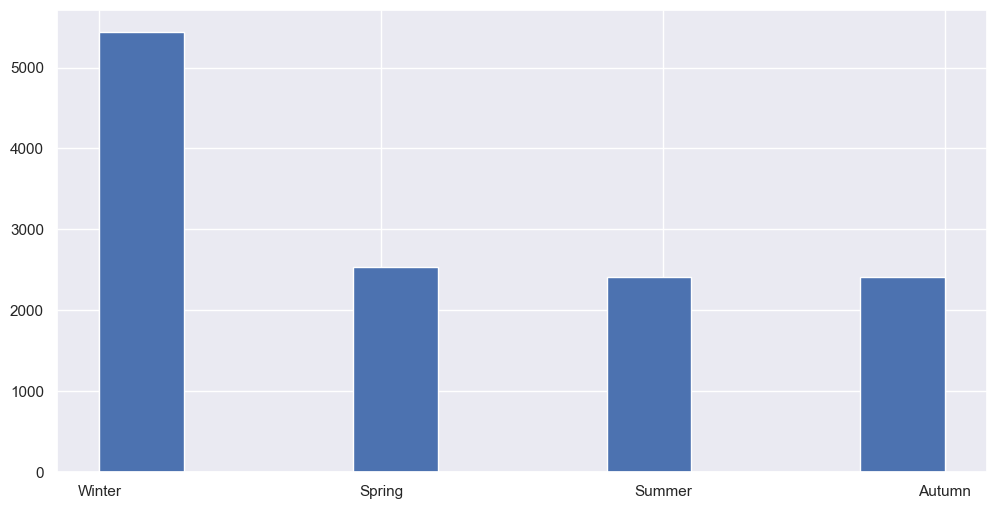

In [31]:
plt.hist(df['Season']) # histogram for season-wise data count

<Axes: xlabel='Weather Type', ylabel='Season'>

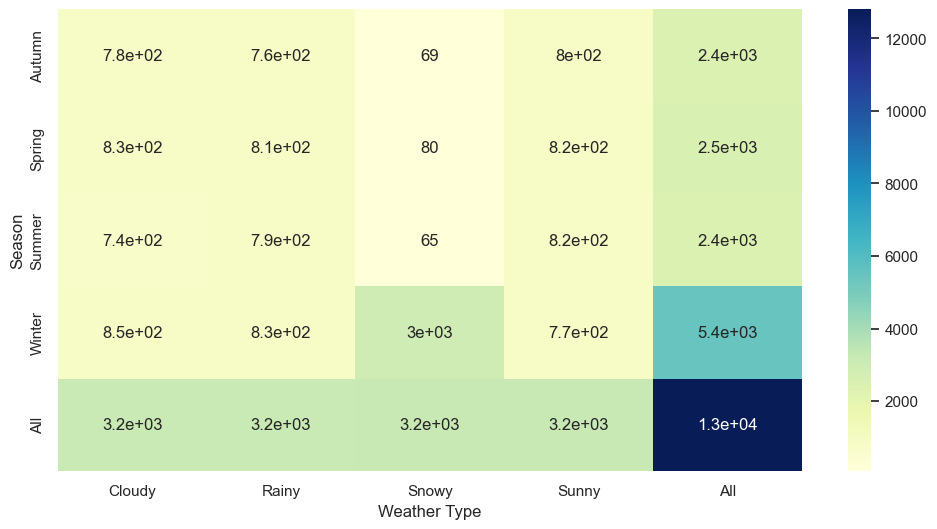

In [33]:
#heatmap visualizes the frequency distribution of different weather types across seasons, with annotations and a color gradient.
sns.heatmap(pd.crosstab(df['Season'], df['Weather Type'], values=df['Weather Type'],margins=True, aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True)

<Axes: xlabel='Wind Speed', ylabel='Weather Type'>

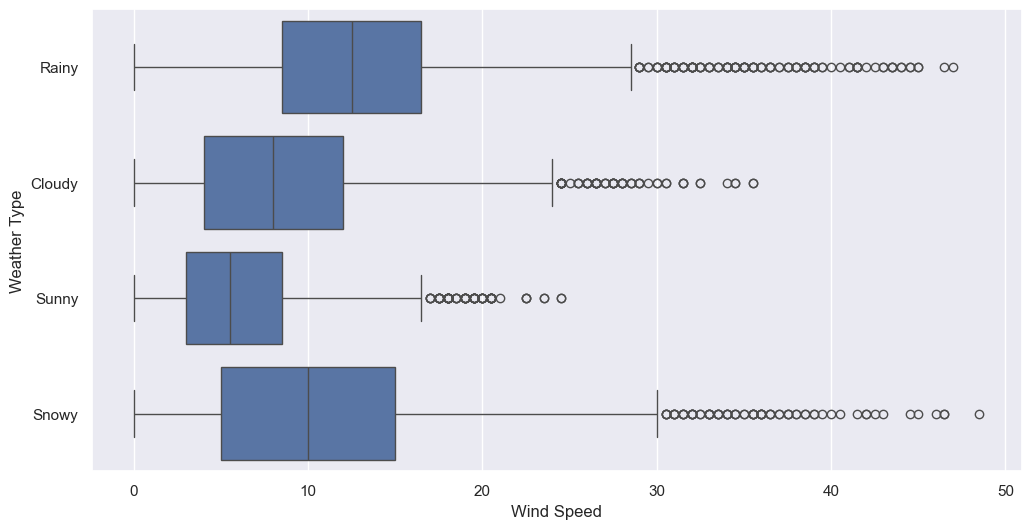

In [35]:
#boxplot between windspeed and weather type to asses mean,sd,range and outliers
sns.boxplot(x='Wind Speed',y='Weather Type',data=df) 

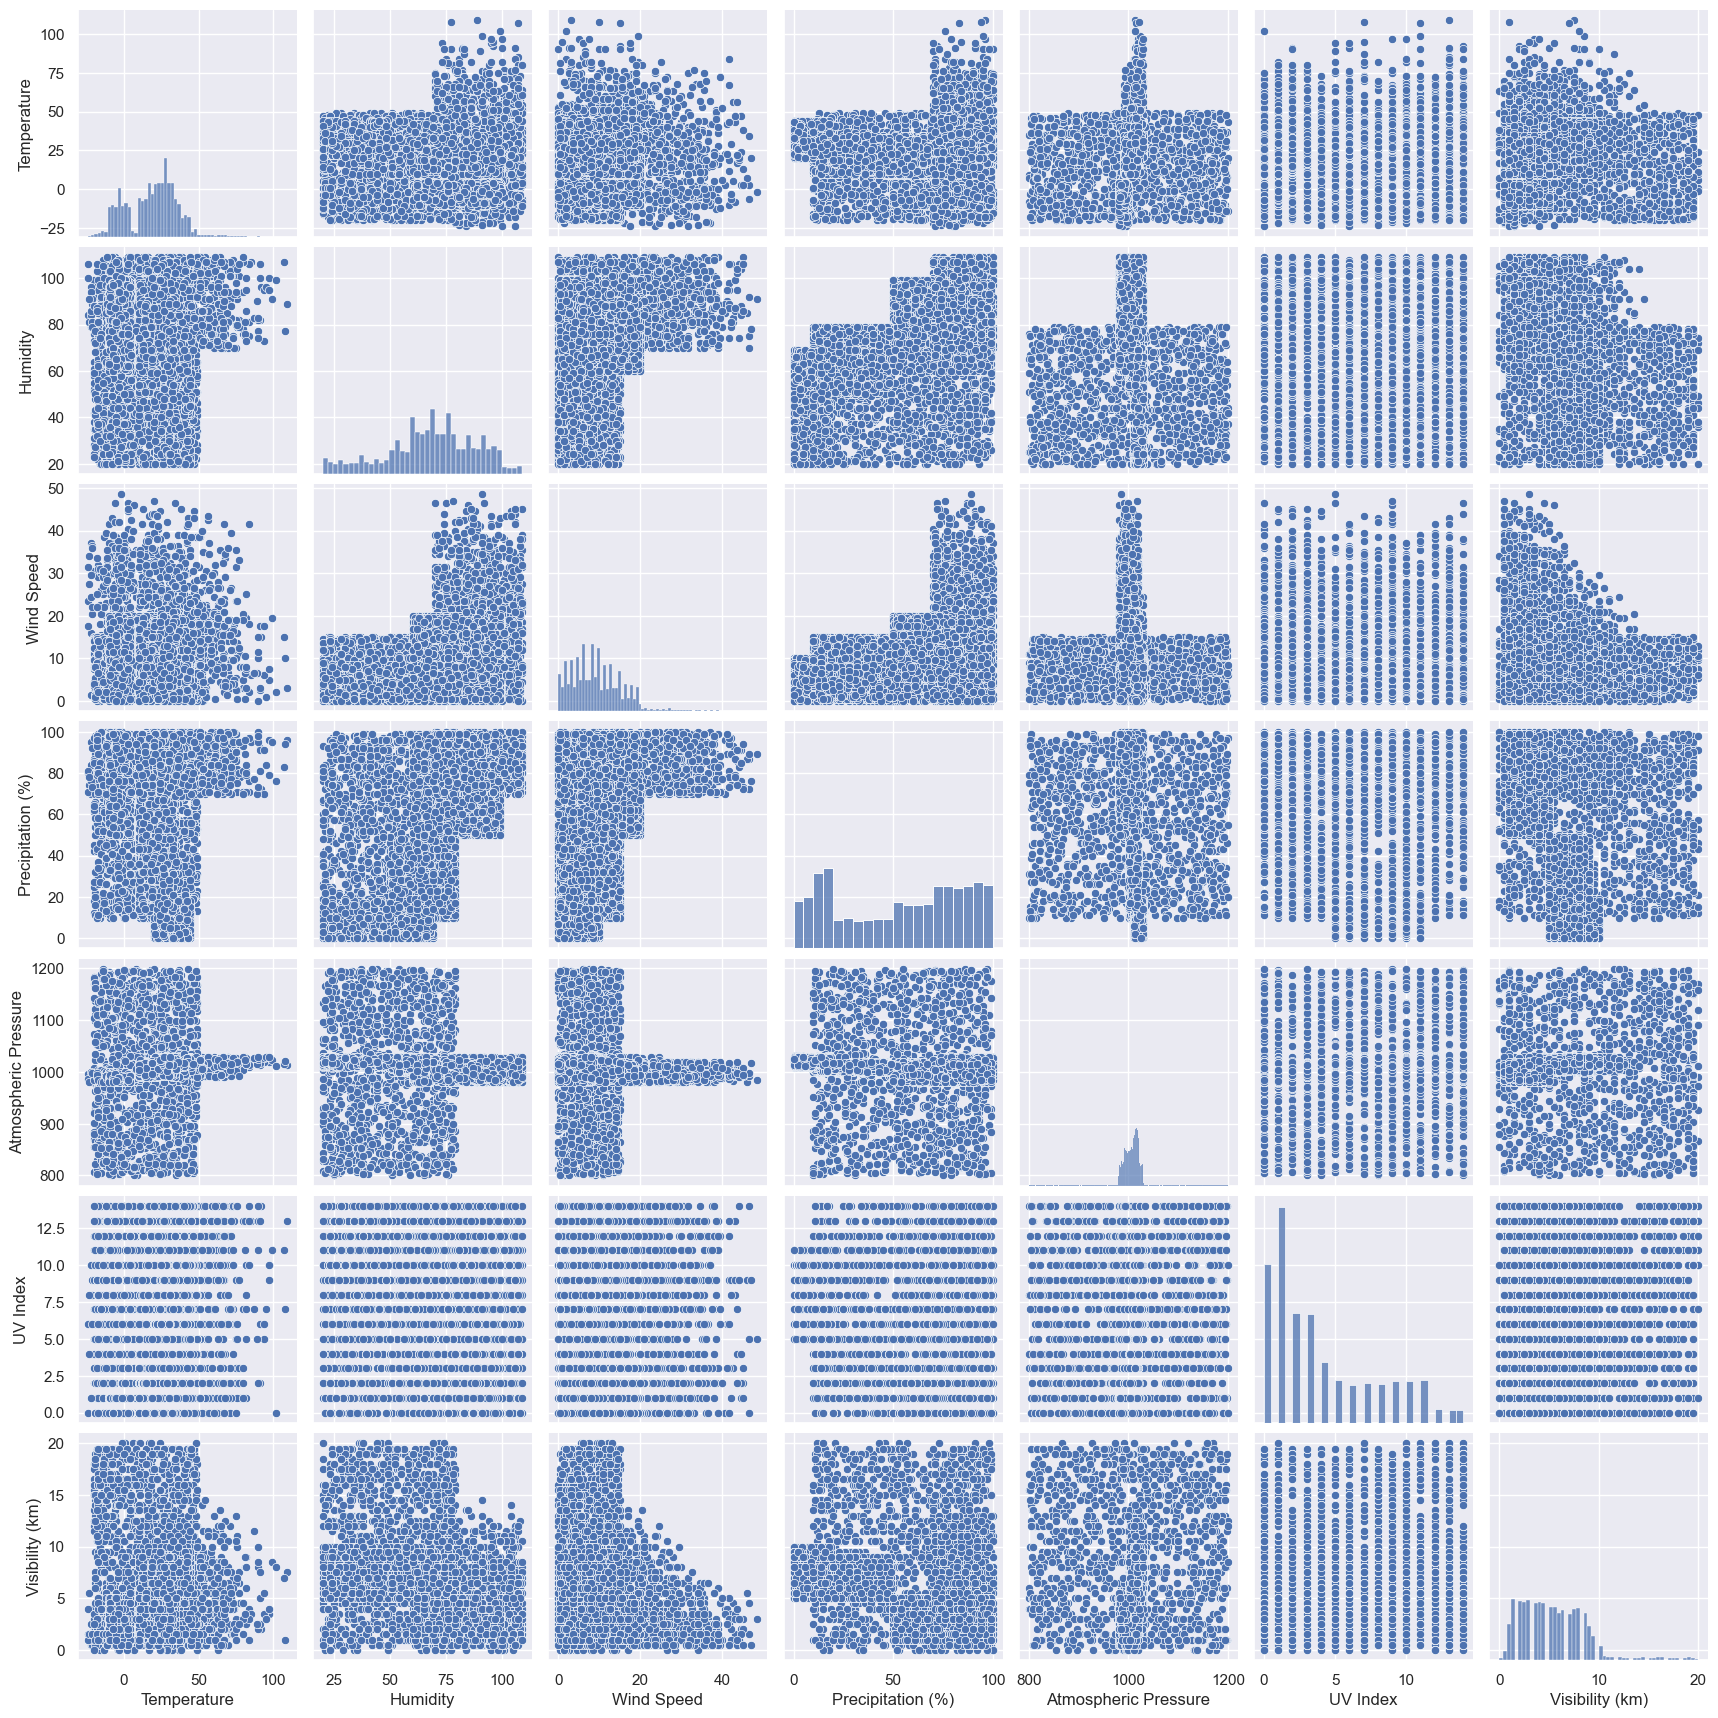

In [37]:
g = sns.pairplot(df) #pairplot for this data frame give a bivariate pairwise analysis between all the numerical variables

Text(0.5, 1.0, 'Locations')

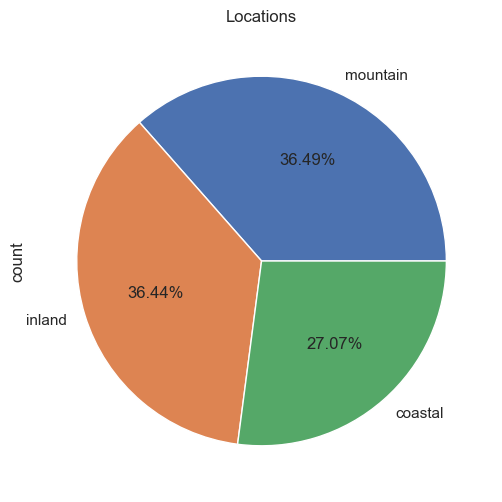

In [38]:
#piechart for location types
df['Location'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Locations')

Text(0.5, 1.0, 'Distribution of Visibility (km)')

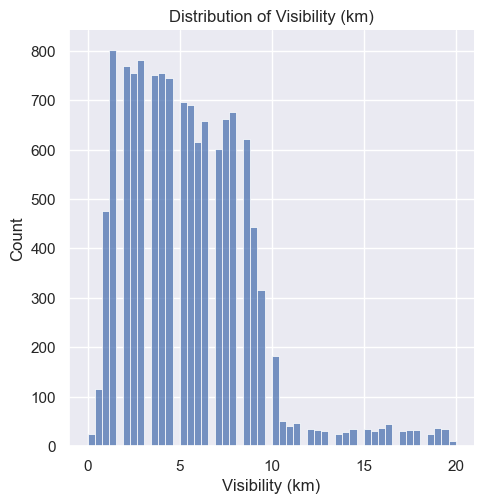

In [57]:
#plotting distribution of visibility
sns.displot(df['Visibility (km)'])
plt.title('Distribution of Visibility (km)')

<Axes: xlabel='Season', ylabel='Humidity'>

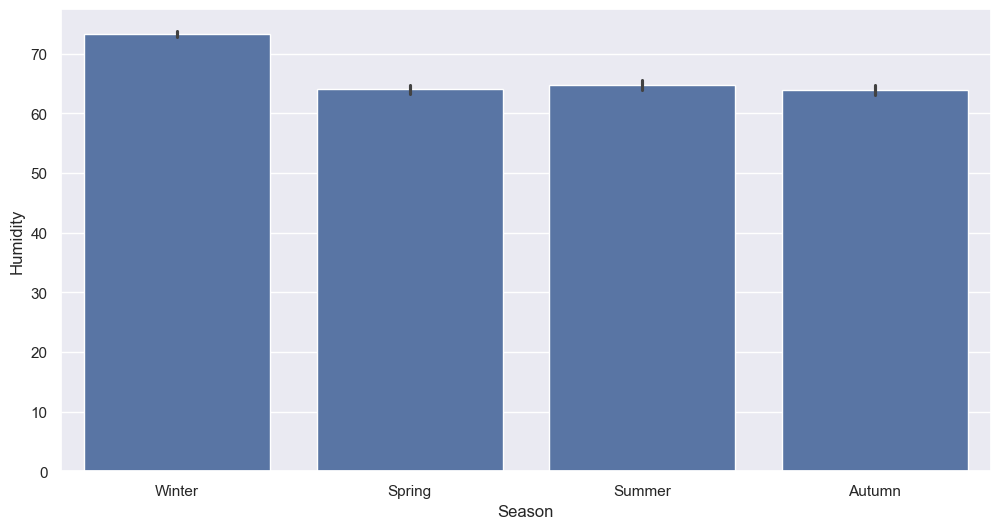

In [61]:
#barplot for relation between season type and humidity
sns.barplot(data=df,x="Season",y="Humidity")

<Axes: xlabel='Season', ylabel='Humidity'>

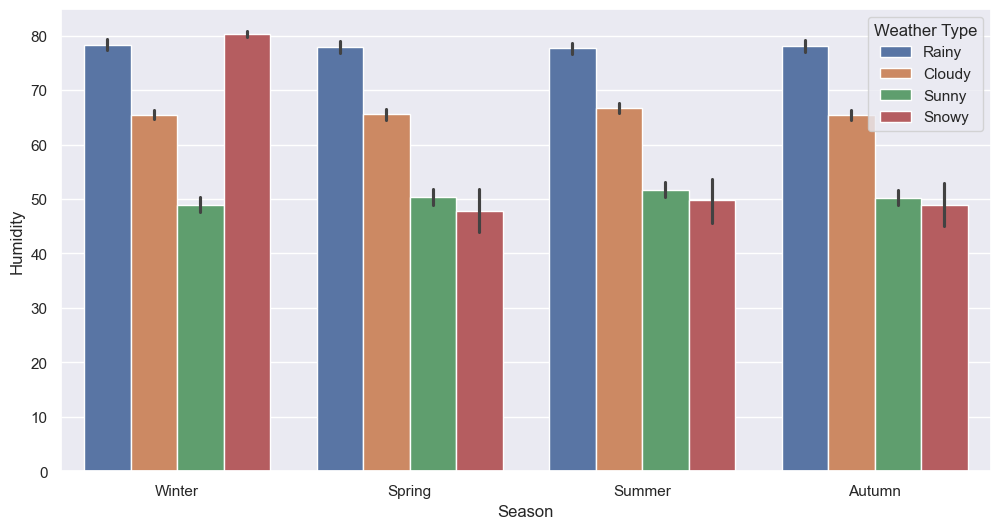

In [63]:
# the hue parameter is used to introduce a third variable that will produce bars with different colors within each category of the x variable.
#This helps in visualizing the relationship between x and y variables, grouped by the hue variable.
sns.barplot(data=df,x="Season",y="Humidity",hue="Weather Type")

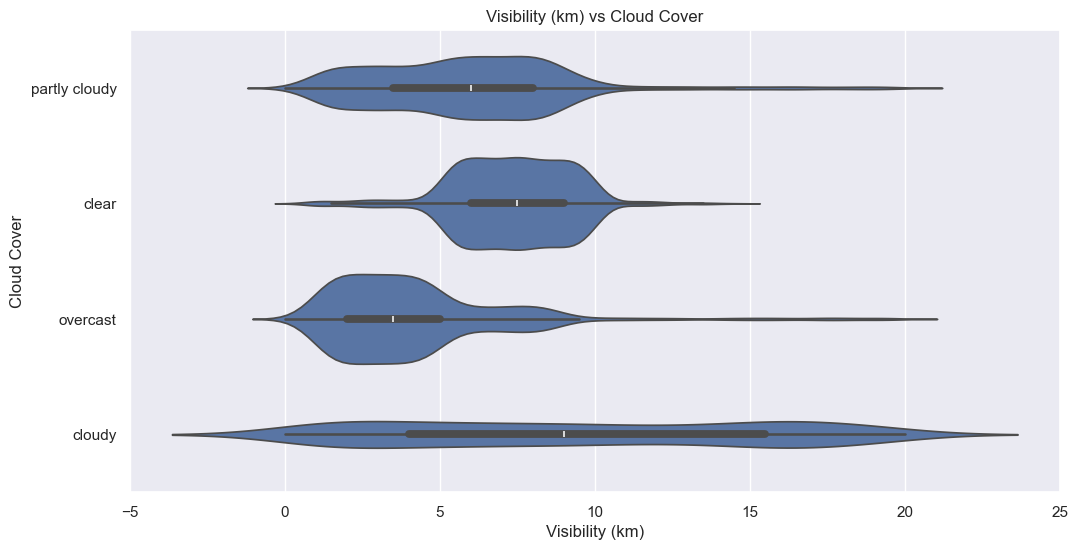

In [65]:
# Violin plot to compare Visibility (km) vs Cloud Cover
sns.violinplot(x='Visibility (km)', y='Cloud Cover', data=df)
plt.title("Visibility (km) vs Cloud Cover")
plt.show()